In [ ]:
!wget https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/blob/main/fintech_banking_dataset.zip?raw=true \
    -O /tmp/fintech_banking_dataset.zip

--2022-08-03 08:23:14--  https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/blob/main/fintech_banking_dataset.zip?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/raw/main/fintech_banking_dataset.zip [following]
--2022-08-03 08:23:14--  https://github.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/raw/main/fintech_banking_dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/main/fintech_banking_dataset.zip [following]
--2022-08-03 08:23:14--  https://raw.githubusercontent.com/gigihsantoso/prediksi-berlangganan-deposito-berjangka-deeplearning/

#Fintech

"Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') dilanggan oleh pelanggan atau tidak. Folder data berisi dua kumpulan data: -

     train.csv: 45.211 baris dan 18 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
     test.csv: 4521 baris dan 18 kolom dengan 10% contoh (4521), dipilih secara acak dari train.csv"

### Variabel input:
1.  age : umur (Numeric)
2.  job: jenis pekerjaan (Categorical)
3.  marital : status perkawinan (Categorical)
4.  education : Pendidikan (Categorical)
5.  default: memiliki kredit dalam default? (Categorical) 
6.  perumahan: memiliki pinjaman perumahan? (Categorical)
7.  loan: memiliki pinjaman pribadi? (Categorical)

### Terkait dengan kontak terakhir kampanye saat ini:
8.  contact: jenis komunikasi kontak (Numeric)
9.  month: kontak terakhir bulan tahun (Numeric)
10. day: hari kontak terakhir dalam seminggu (Numeric)
11. duration: durasi kontak terakhir, dalam detik (Numeric)

### Atribut lainnya:
12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (Numeric)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak sebelumnya dihubungi)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (kategori: 'gagal', 'tidak ada', 'sukses')

Sumber: [Dataset Bank Marketing Portugis](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

##Setup

In [ ]:
import pathlib
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive, files, data_table
import tensorflow as tf
from sklearn.metrics import confusion_matrix

## Load Data

In [ ]:
data_url = "/tmp/fintech_banking_dataset.zip"
data_dir = zipfile.ZipFile(data_url, 'r')
data_dir.extractall("MyFile")
data_dir.close()

In [ ]:
dataset_train=pd.read_csv('MyFile/train.csv', delimiter=";")
dataset_test=pd.read_csv('MyFile/test.csv', delimiter=";")

##Data Explorer

In [ ]:
print(f"jumlah data untuk train adalah {len(dataset_train)}")
print(f"jumlah data untuk test adalah {len(dataset_test)}")

jumlah data untuk train adalah 45211
jumlah data untuk test adalah 4521


In [ ]:
train_no = len(dataset_train.loc[dataset_train['y'].eq("no")])
train_yes = len(dataset_train.loc[dataset_train['y'].eq("yes")])
test_no = len(dataset_test.loc[dataset_test['y'].eq("no")])
test_yes = len(dataset_test.loc[dataset_test['y'].eq("yes")])
print(f"jumlah data untuk train dengan y = No adalah {train_no}, y = Yes adalah {train_yes}")
print(f"jumlah data untuk test dengan y = No adalah {test_no}, y = Yes adalah {test_yes}")

jumlah data untuk train dengan y = No adalah 39922, y = Yes adalah 5289
jumlah data untuk test dengan y = No adalah 4000, y = Yes adalah 521


In [ ]:
dataset_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
dataset_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

melihat type pada data set

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Insight**:

***age, day*** std < mean, sebaran data semakin akurat dengan mean

***balance, campaign, pdays, previous*** std > mean yang dimana nilai mean merupakan representasi yang buruk dari keseluruhan data

***duration*** merupakan output kontak terakhir kampanye sehingga tidak bisa dimasukan ke model


In [ ]:
dataset_train_analyst = dataset_train.copy()
dataset_test_analyst = dataset_test.copy()

In [ ]:
numeric_data = dataset_train_analyst.describe()
numeric_data

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [ ]:
dataset_test_analyst.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [ ]:
category_data = dataset_train_analyst.drop(columns=["y"]).describe(include=[object])
category_data

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959

In [ ]:
dataset_test_analyst.drop(columns=["y"]).describe(include=[object])

job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

       poutcome  
count      4521  
unique        4  
top     unknown  
freq       3705

###Visualisasi data variable categorial  

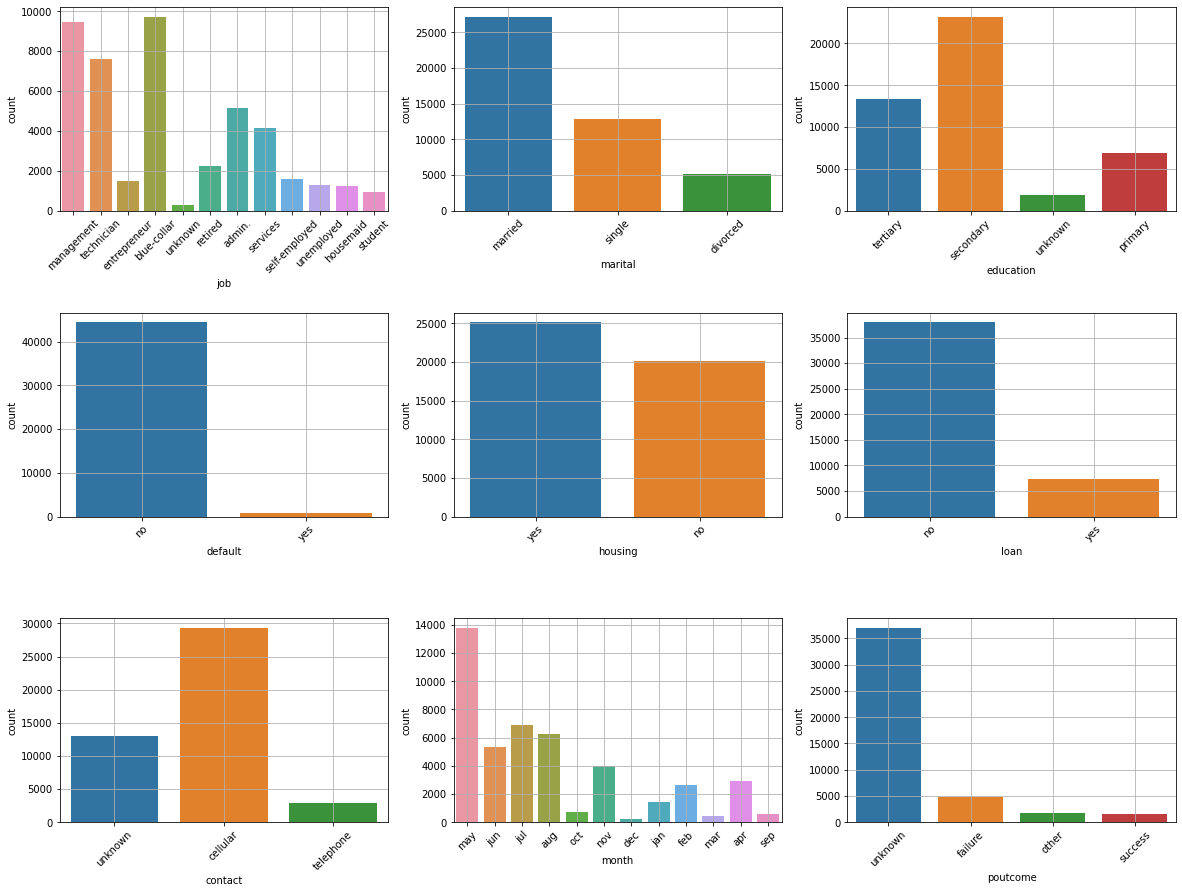

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for col,i in zip(category_data.columns, ax.flatten()):
  g = sns.countplot(x=col, data=dataset_train_analyst, ax=i)
  g.tick_params(axis="x", rotation=45)
  i.grid(True)
plt.subplots_adjust(hspace=0.5)
plt.show()

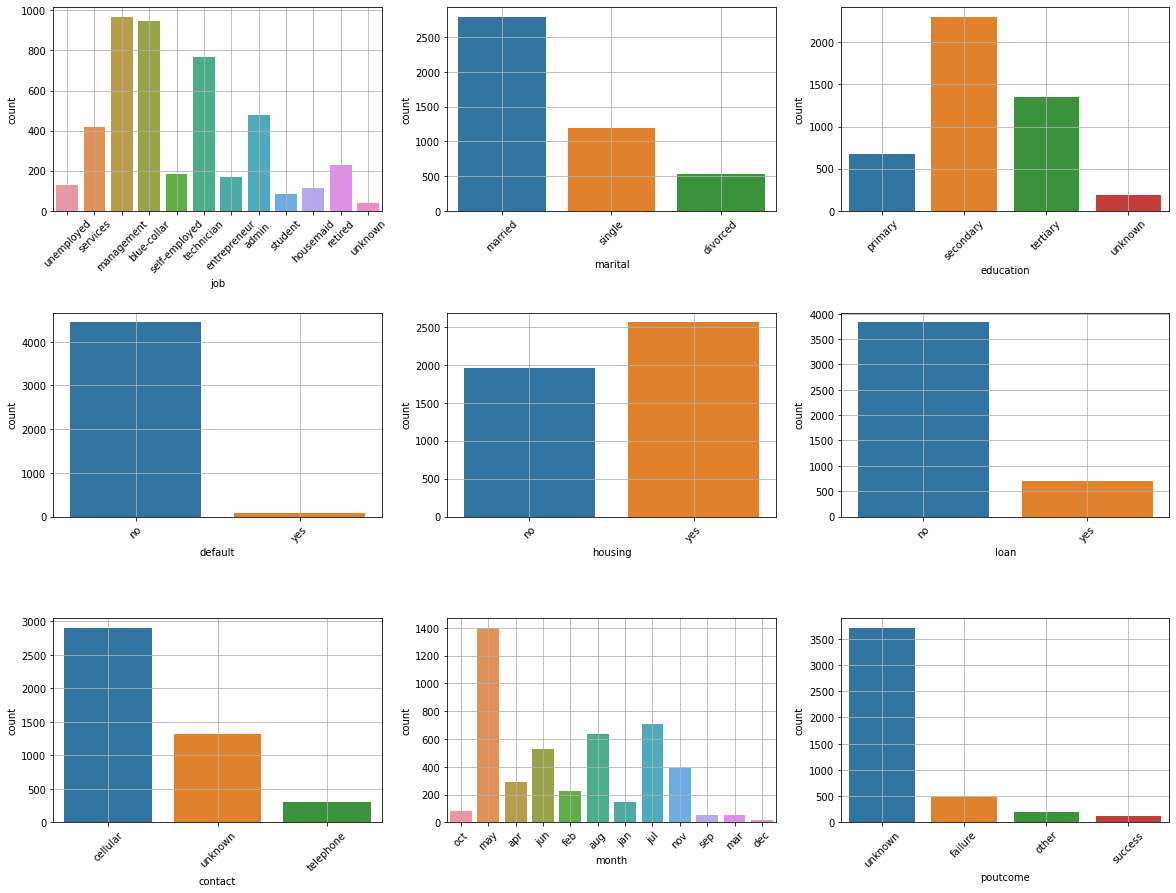

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for col,i in zip(category_data.columns, ax.flatten()):
  g = sns.countplot(x=col, data=dataset_test_analyst, ax=i)
  g.tick_params(axis="x", rotation=45)
  i.grid(True)
plt.subplots_adjust(hspace=0.5)
plt.show()

###Visualisasi Sebaran Data Numeric

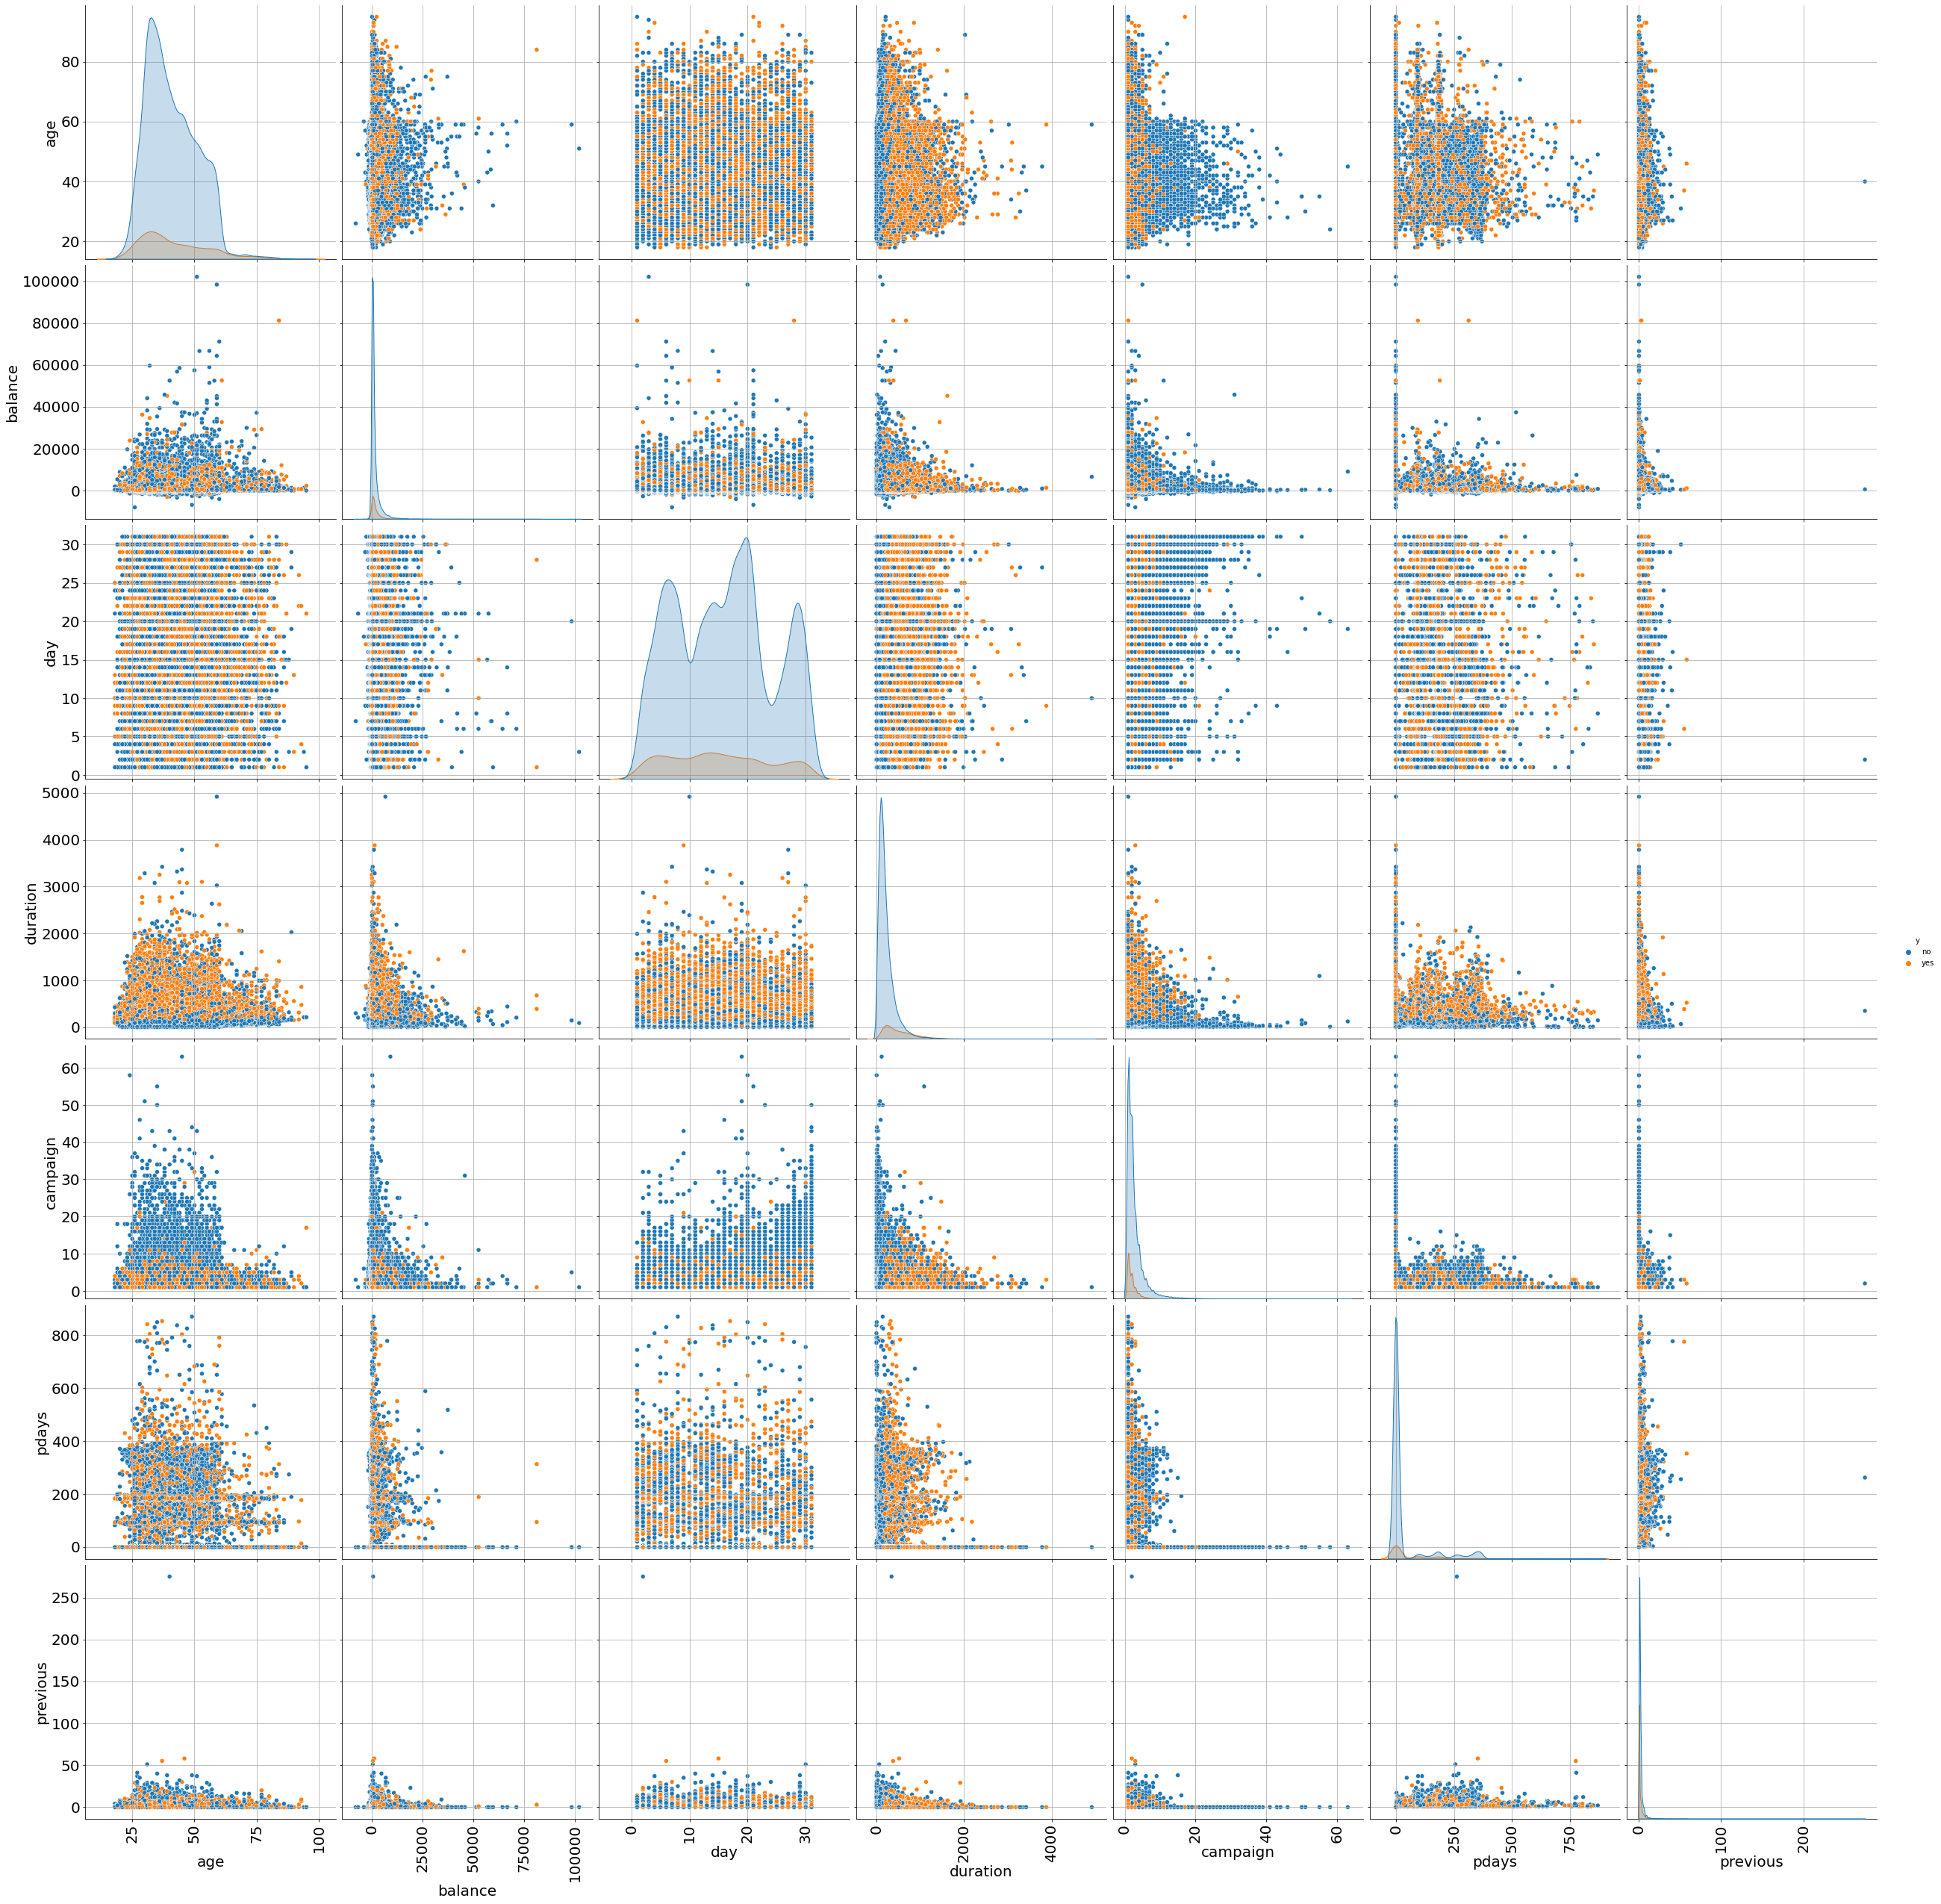

In [ ]:
scatter_plot_data = dataset_train_analyst.drop(columns=category_data.columns)
g = sns.pairplot(scatter_plot_data, hue="y", height=5)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize = 20, rotation = 90)
    ax.tick_params(axis="y", labelsize = 20)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation=90)
    ax.grid(True)
plt.show()

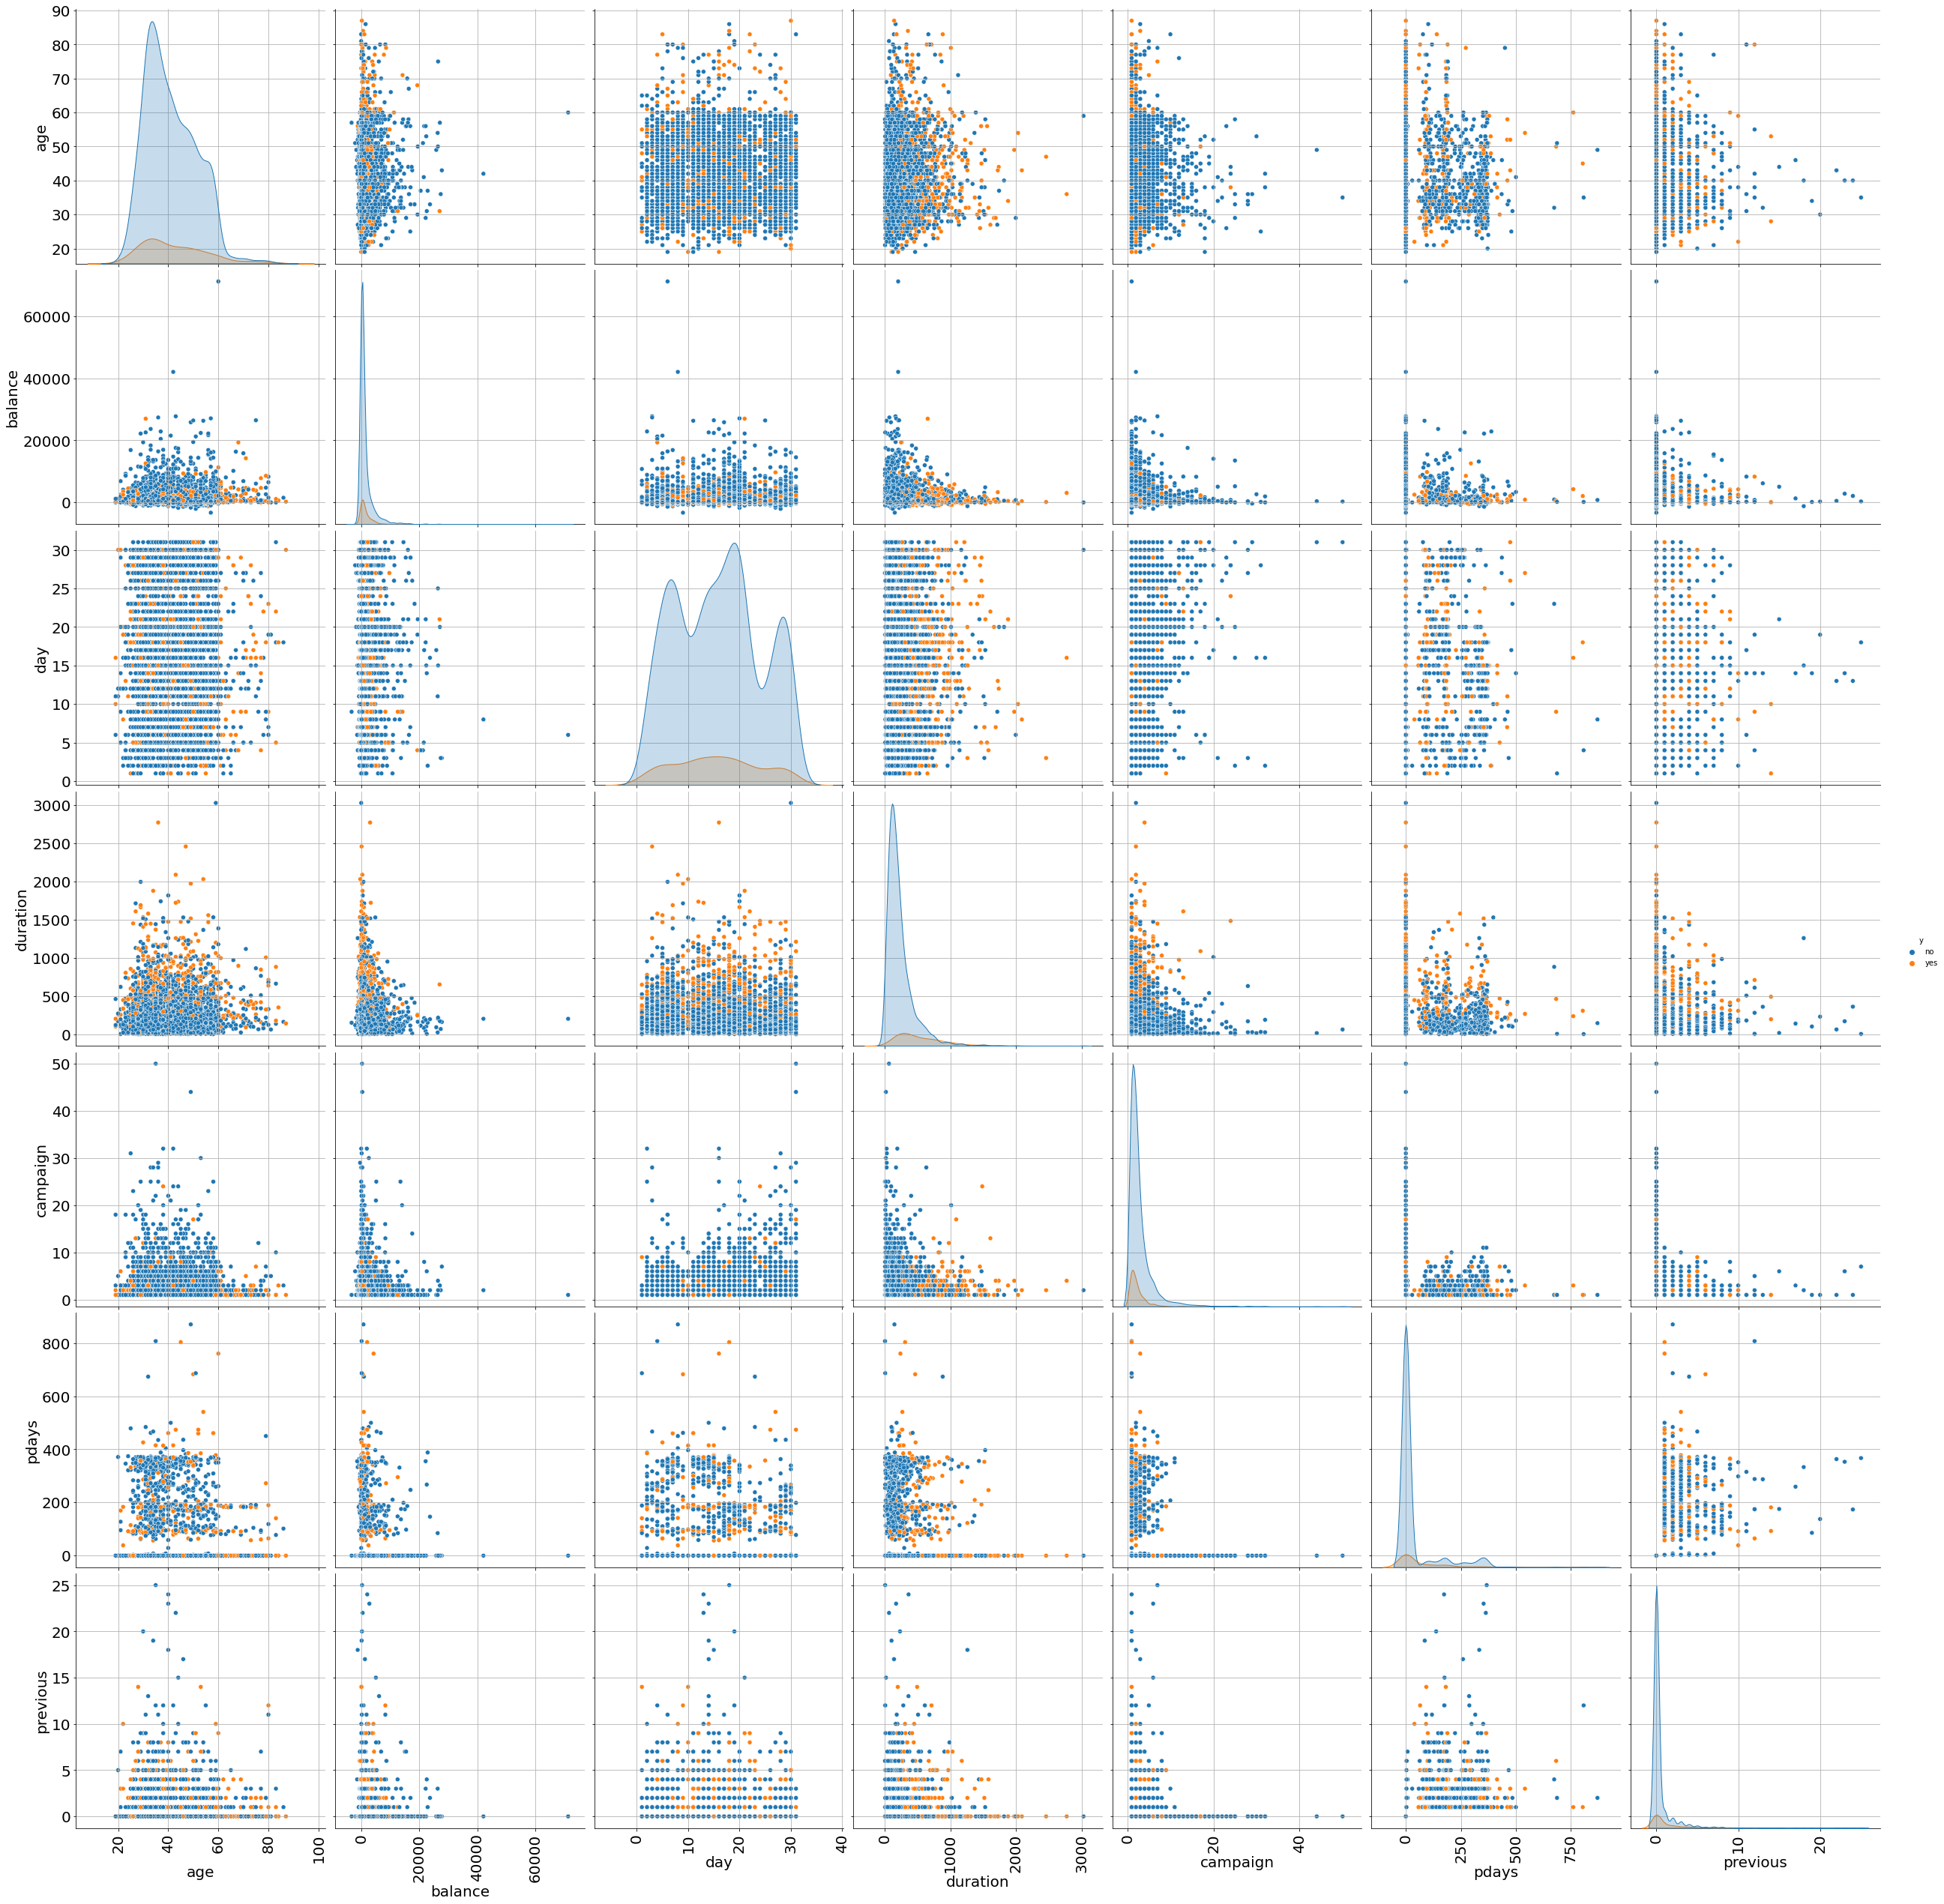

In [ ]:
scatter_plot_data = dataset_test_analyst.drop(columns=category_data.columns)
g = sns.pairplot(scatter_plot_data, hue="y", height=5)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize = 20, rotation = 90)
    ax.tick_params(axis="y", labelsize = 20)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation=90)
    ax.grid(True)
plt.show()

###Visualisasi data boxplot

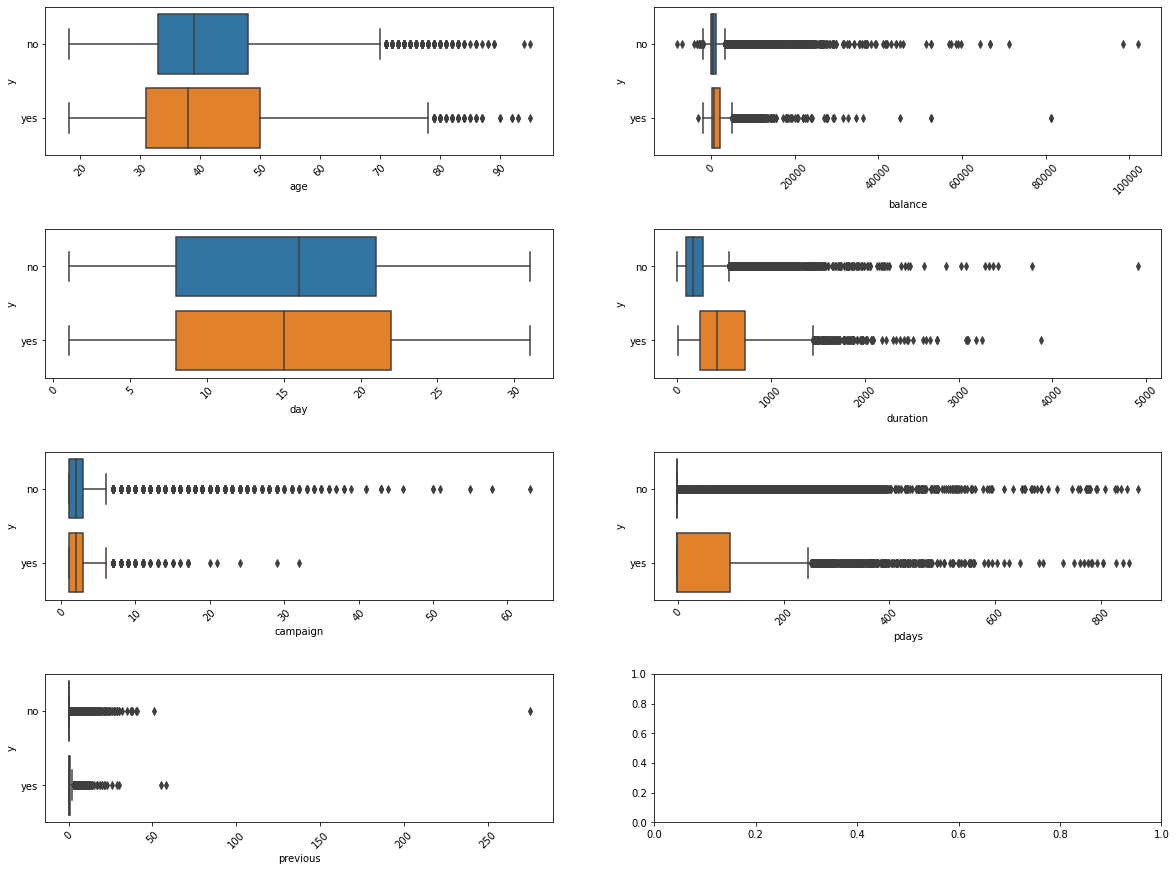

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
for col,i in zip(numeric_data.columns, ax.flatten()):
  g = sns.boxplot(x=col, y='y', data=dataset_train_analyst, ax=i)
  g.tick_params(axis="x", rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.show()

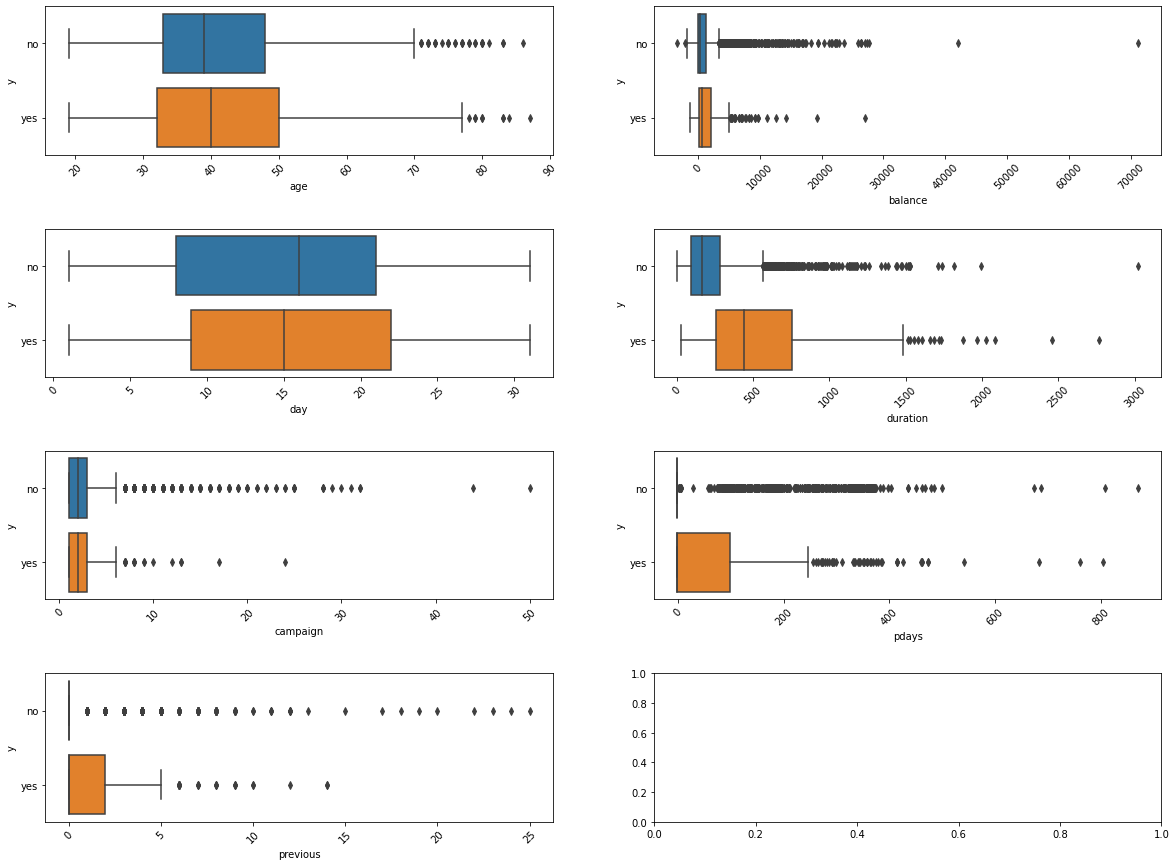

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
for col,i in zip(numeric_data.columns, ax.flatten()):
  g = sns.boxplot(x=col, y='y', data=dataset_test_analyst, ax=i)
  g.tick_params(axis="x", rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.show()

##Feature Selection with IQR

In [ ]:
dataset_train_fc_iqr = dataset_train.copy()

In [ ]:
Q1_balance = numeric_data.loc['25%', 'balance']
Q3_balance = numeric_data.loc['75%', 'balance']
IQR_balance = Q3_balance - Q1_balance
outlier_upper_balance = Q3_balance +  (1.5 * IQR_balance)
outlier_lower_balance = Q1_balance -  (1.5 * IQR_balance)

Q1_campaign = numeric_data.loc['25%', 'campaign']
Q3_campaign = numeric_data.loc['75%', 'campaign']
IQR_campaign = Q3_campaign - Q1_campaign
outlier_upper_campaign = Q3_campaign +  (1.5 * IQR_campaign)
outlier_lower_campaign = Q1_campaign -  (1.5 * IQR_campaign)

Q1_pdays = numeric_data.loc['25%', 'pdays']
Q3_pdays = numeric_data.loc['75%', 'pdays']
IQR_pdays = Q3_pdays - Q1_pdays
outlier_upper_pdays = Q3_pdays +  (1.5 * IQR_pdays)
outlier_lower_pdays = Q1_pdays -  (1.5 * IQR_pdays)

Q1_previous = numeric_data.loc['25%', 'previous']
Q3_previous = numeric_data.loc['75%', 'previous']
IQR_previous = Q3_previous - Q1_previous
outlier_upper_previous = Q3_previous +  (1.5 * IQR_previous)
outlier_lower_previous = Q1_previous -  (1.5 * IQR_previous)

print("Check Outlier balance = ", outlier_lower_balance, " - "  ,outlier_upper_balance)
print("Check Outlier campaign = ", outlier_lower_campaign, " - " , outlier_upper_campaign)
print("Check Outlier pdays = ", outlier_lower_pdays, " - "  ,outlier_upper_pdays)
print("Check Outlier previous = ", outlier_lower_previous, " - " , outlier_upper_previous)

Check Outlier balance =  -1962.0  -  3462.0
Check Outlier campaign =  -2.0  -  6.0
Check Outlier pdays =  -1.0  -  -1.0
Check Outlier previous =  0.0  -  0.0


In [ ]:
dataset_train_fc_iqr = dataset_train_fc_iqr.loc[
                                              dataset_train_fc_iqr['balance'].le(outlier_upper_balance)&
                                              dataset_train_fc_iqr['balance'].ge(outlier_lower_balance)&
                                              dataset_train_fc_iqr['campaign'].le(outlier_upper_campaign)&
                                              dataset_train_fc_iqr['campaign'].ge(outlier_lower_campaign)&
                                              dataset_train_fc_iqr['pdays'].le(outlier_upper_pdays)&
                                              dataset_train_fc_iqr['pdays'].ge(outlier_lower_pdays)
]
print(dataset_train_fc_iqr.shape)

(30635, 17)


In [ ]:
dataset_train_fc_iqr.describe()

age       balance           day      duration      campaign  \
count  30635.000000  30635.000000  30635.000000  30635.000000  30635.000000   
mean      40.614787    616.906871     15.765725    261.640999      2.188673   
std       10.360485    836.838210      8.335700    260.745427      1.338014   
min       18.000000  -1944.000000      1.000000      0.000000      1.000000   
25%       32.000000     34.000000      8.000000    106.000000      1.000000   
50%       39.000000    325.000000     16.000000    182.000000      2.000000   
75%       48.000000    939.500000     22.000000    321.000000      3.000000   
max       95.000000   3462.000000     31.000000   3881.000000      6.000000   

         pdays  previous  
count  30635.0   30635.0  
mean      -1.0       0.0  
std        0.0       0.0  
min       -1.0       0.0  
25%       -1.0       0.0  
50%       -1.0       0.0  
75%       -1.0       0.0  
max       -1.0       0.0

In [ ]:
dataset_train_fc_iqr.drop(columns=["y"]).describe(include=[object])

job  marital  education default housing   loan   contact  \
count         30635    30635      30635   30635   30635  30635     30635   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           6914    18399      16098   29966   16928  25302     17979   

        month poutcome  
count   30635    30635  
unique     12        1  
top       may  unknown  
freq     9937    30635

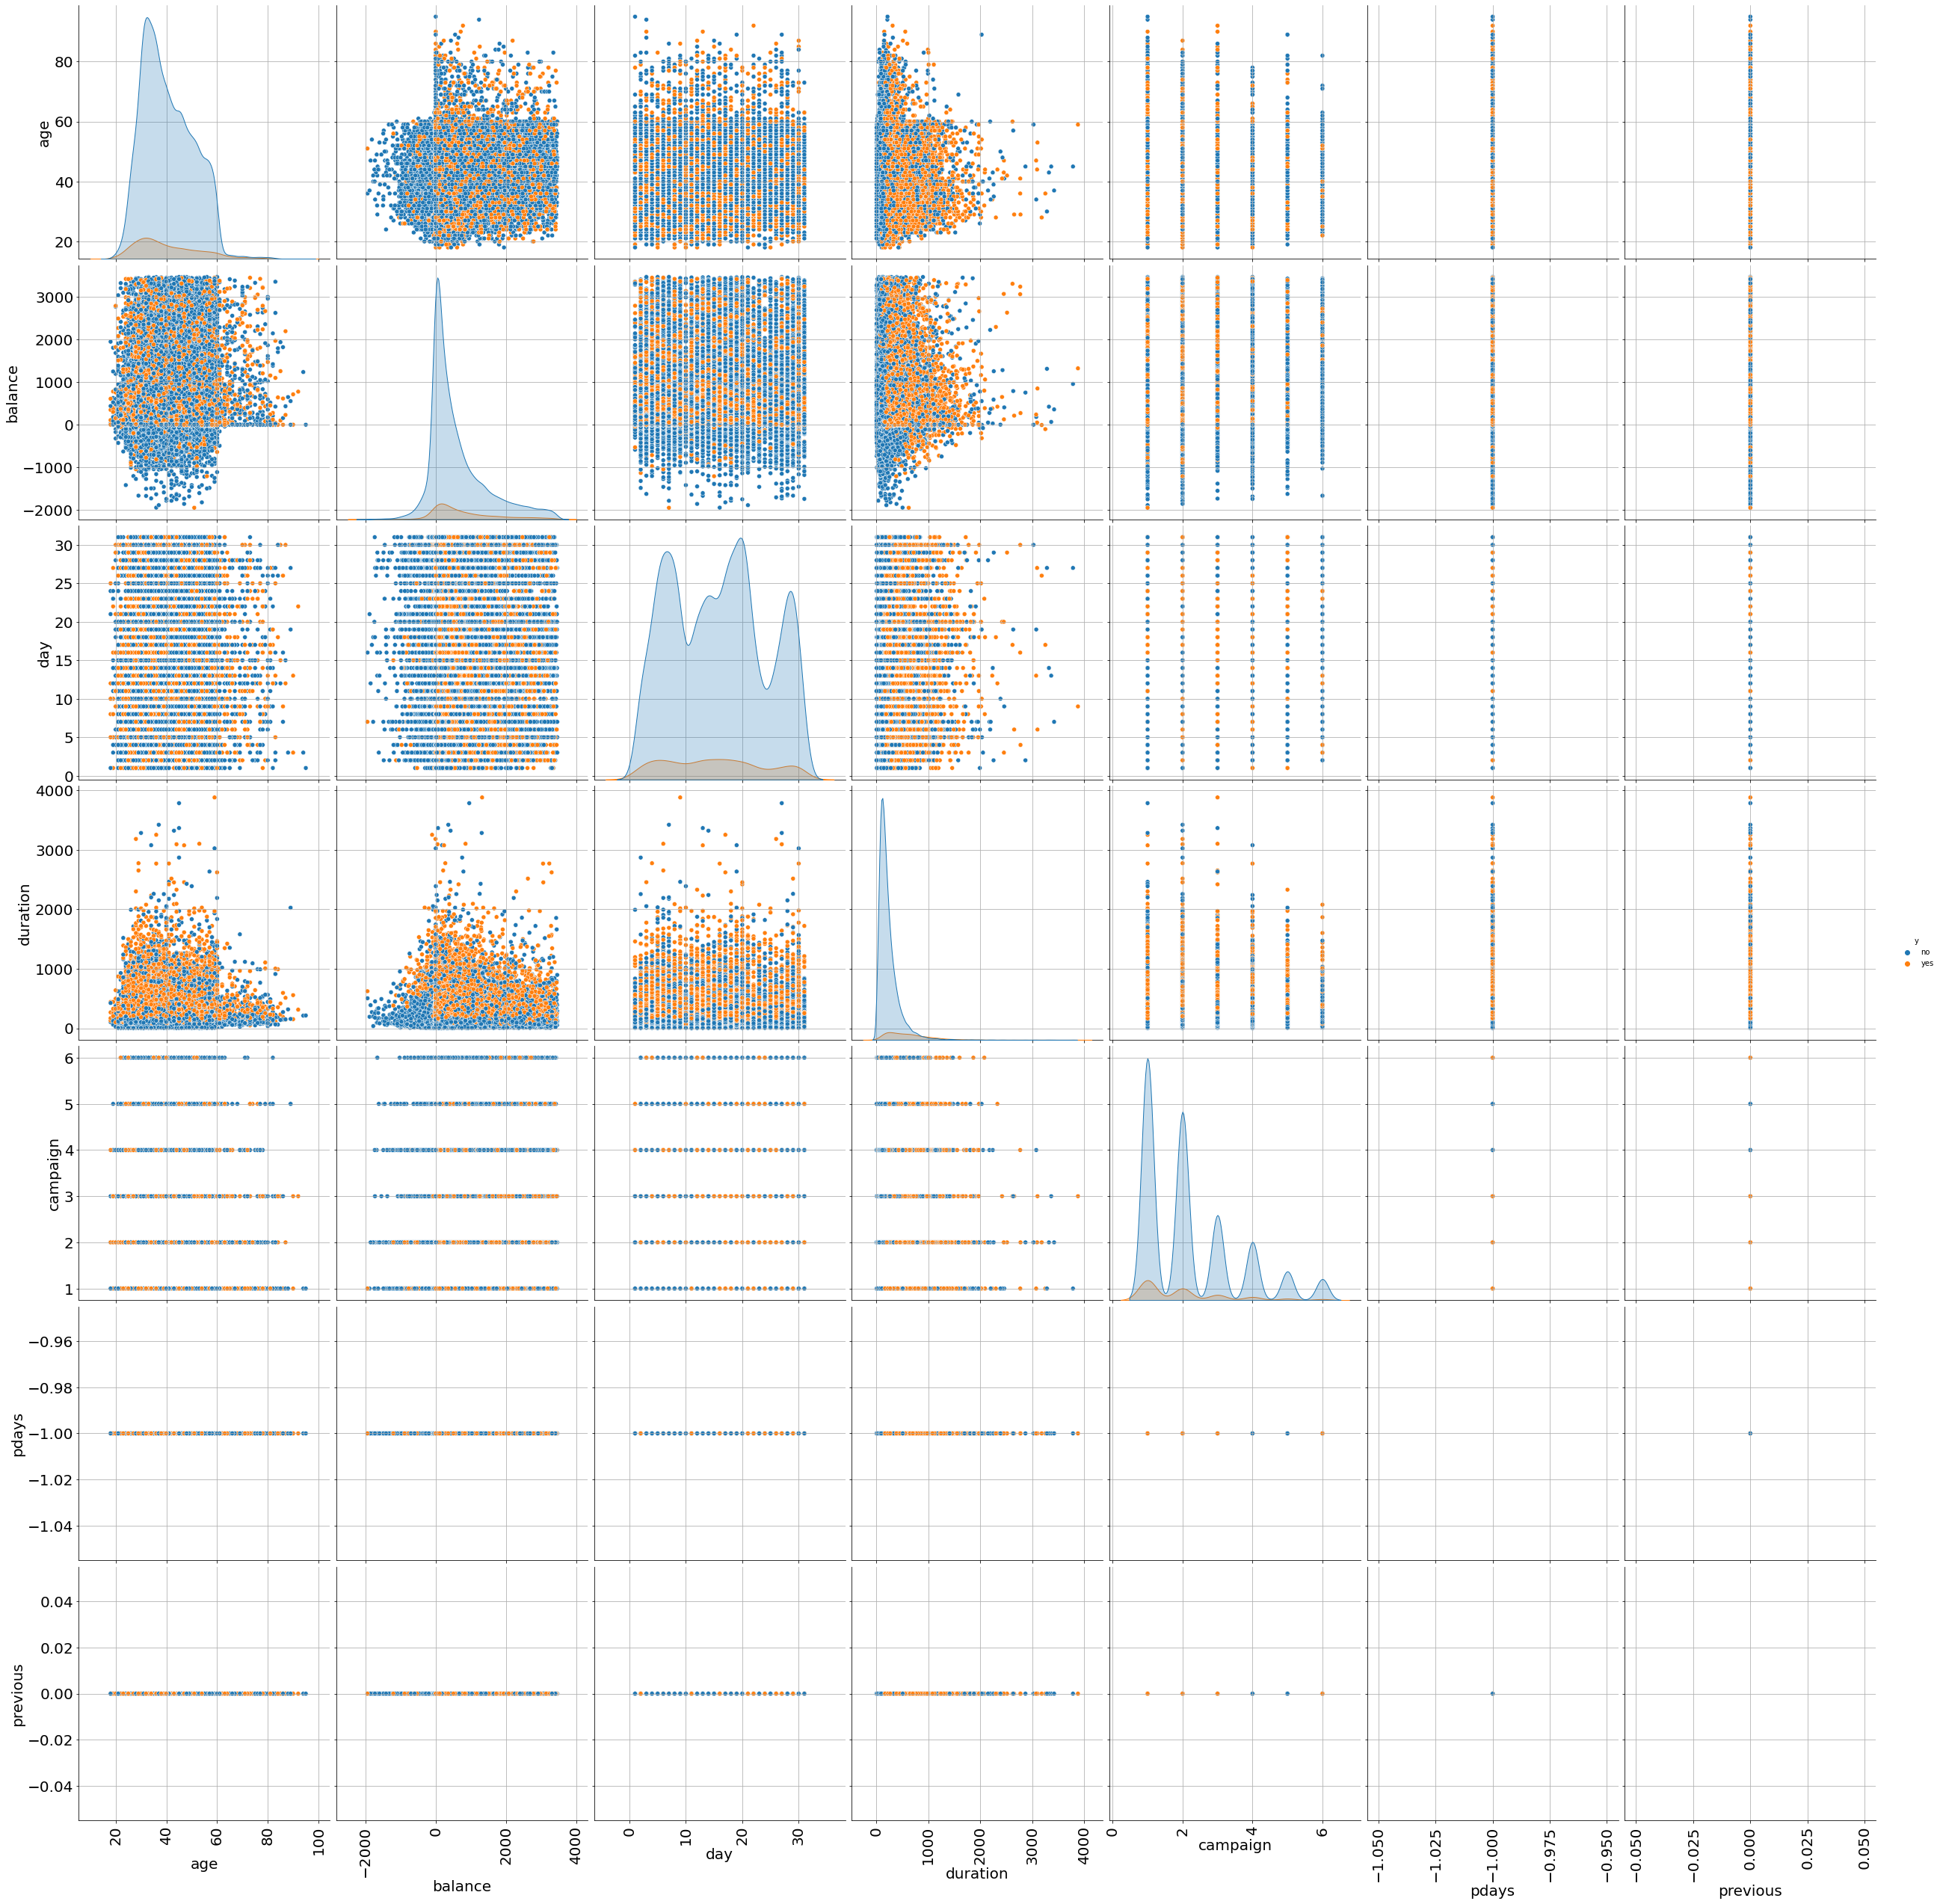

In [ ]:
scatter_plot_data = dataset_train_fc_iqr.drop(columns=category_data.columns)
g = sns.pairplot(scatter_plot_data, hue="y", height=5)
for ax in g.axes.flatten():
    ax.tick_params(axis="x", labelsize = 20, rotation = 90)
    ax.tick_params(axis="y", labelsize = 20)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation=90)
    ax.grid(True)
plt.show()

##Helper Function

function split data

In [ ]:
def dataframe_split(data, ratio= 0.2, shuffle= 0):
  len_ = int(len(data) - (ratio*len(data)))
  if shuffle == 0 :
    part_  = data.iloc[:int(1 + len_)]
    rest_part_ = data.drop(part_.index)
  elif shuffle == 1:
    part_ = data.sample(frac = 1.0 - ratio)
    rest_part_ = data.drop(part_.index)
  return (part_, rest_part_)

fucntion membuat dataset

In [ ]:
def dataframe_to_dataset(data, batch_size=32):
  df = data.copy()
  labels = df.pop('target')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
def dataframe_imbalance_to_dataset(data, 
                                   batch_size=32, 
                                   shuffle=32, 
                                   weights=[0.5, 0.5]):
  df = data.copy()
  labels = df.pop('target')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  data = tf.data.Dataset.from_tensor_slices((dict(df), labels)).batch(batch_size)

  no_ds = (data
          .unbatch()
          .filter(lambda features, label: label==0)
          .shuffle(shuffle)
          .repeat())
  yes_ds = (data
            .unbatch()
            .filter(lambda features, label: label==1)
            .shuffle(shuffle)
            .repeat())
  
  ds = tf.data.Dataset.sample_from_datasets([no_ds, yes_ds], weights=weights)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

function preprocessing numeric

In [ ]:
def numeric_preprocessing(name, dataset, step):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Normalization()
  layer.adapt(feature_dataset, steps=step)

  return layer

In [ ]:
def numeric_to_categories_preprocessing(name, dataset, step, num_bins, output_mode="multi_hot"):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Discretization(num_bins=num_bins, epsilon=0.00001)
  layer.adapt(feature_dataset, steps=step)
  
  category_encoding = tf.keras.layers.CategoryEncoding(num_tokens=num_bins, output_mode=output_mode)
  return lambda feature:  category_encoding(layer(feature))

fucntion preprocessing categories

In [ ]:
def categories_preprocessing(name, dataset, dtype, step=1, output_mode="multi_hot"):
  if(dtype == "int64"):
    lookup = tf.keras.layers.IntegerLookup()
  else:
    lookup = tf.keras.layers.StringLookup()
  feature_dataset = dataset.map(lambda x,y: x[name])
  lookup.adapt(feature_dataset, steps=step)

  category_encoding = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), output_mode=output_mode)
  return lambda feature:  category_encoding(lookup(feature))

plot metric

In [ ]:
def plot_metric(x, y, history, metric):
  fig, ax = plt.subplots(x, y, figsize=(15,10))
  epochs = range(len(history.history[metric[0]]))
  for metric, ax in zip(metric, ax.flatten()):
    ax.plot(epochs, history.history[metric], 'r', label='train')
    ax.plot(epochs, history.history['val_'+metric], 'b', ls="--", label='val')
    ax.set_ylabel(metric)
    ax.set_xlabel('epoch')
    ax.legend()  
  plt.show()

plot confution matrix

In [ ]:
def plot_confution_matrix(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Tidak Berlangganan dengan Prediksi yang tepat (True Negatives): ', cm[0][0])
  print('Tidak Berlangganan dengan Prediksi yang salah (False Positives): ', cm[0][1])
  print('Berlangganan dengan Prediksi yang salah (False Negatives): ', cm[1][0])
  print('Berlangganan dengan Prediksi yang tepat (True Positives): ', cm[1][1])
  print('Total: ', np.sum(cm[1]))

##Data Preprocessing

mengubah column y, dengan nilai 0 menunjukan *NO* dan nilai 1 menunjukan *YES*

In [ ]:
dataset_train_model = dataset_train_fc_iqr.copy()

In [ ]:
dataset_train_model['target'] = dataset_train_model.loc[:, 'y'].apply(lambda x : 0 if x == "no" else 1)

dataset_train_model.drop(columns=["duration", "day", "pdays", "previous", "month", "contact", "poutcome", "y"], inplace=True)

In [ ]:
dataset_test['target'] = dataset_test.loc[:, 'y'].apply(lambda x : 0 if x == "no" else 1)

dataset_test.drop(columns=["duration", "day", "pdays", "previous", "month", "contact", "poutcome", "y"], inplace=True)

dataset train ini merupakan dataframe pandas, split data train dengan ratio 80:20 . 20 % untuk validasi

In [ ]:
train, val = dataframe_split(dataset_train_model, ratio = 0.2, shuffle=1)

In [ ]:
print(len(train), 'training examples')
print(len(val), 'validation examples')

24508 training examples
6127 validation examples


membuat dataset

In [ ]:
batch_size = 128
step = 256

train_ds = dataframe_imbalance_to_dataset(train, batch_size=batch_size, weights=[0.5, 0.5])
val_ds = dataframe_to_dataset(val, batch_size=batch_size)
test_ds = dataframe_to_dataset(dataset_test, batch_size=batch_size)

cek data

In [ ]:
for features, labels in train_ds.take(1):
  print(labels.numpy())

[0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1]


membagikan column berdasarkan numeric atau categorical integer atau string

In [ ]:
bins= [10000,15000]
num_to_categorical_keys = ["campaign", "balance"]
num_keys = ["age"]
categorical_string_keys = ["job", "marital", "education"]
binary_string_keys = ["housing", "loan", "default"]
all_inputs = []
all_preprocessors = []

In [ ]:
for categorical in binary_string_keys:
  input = tf.keras.Input(shape=(1,), name=categorical, dtype="string")
  cat_layer = categories_preprocessing(name=categorical, dataset=train_ds, dtype="string", step=step, output_mode="one_hot")
  cat_preprocessor = cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(cat_preprocessor)

In [ ]:
for categorical in categorical_string_keys:
  input = tf.keras.Input(shape=(1,), name=categorical, dtype="string")
  cat_layer = categories_preprocessing(name=categorical, dataset=train_ds, dtype="string", step=step, output_mode="one_hot")
  cat_preprocessor = cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(cat_preprocessor)

In [ ]:
for num_cat, bin in zip(num_to_categorical_keys, bins):
  input = tf.keras.Input(shape=(1,), name=num_cat, dtype="int64")
  num_cat_layer = numeric_to_categories_preprocessing(name=num_cat, dataset=train_ds, step=step, num_bins=bin, output_mode="one_hot")
  num_cat_preprocessor = num_cat_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(num_cat_preprocessor)

In [ ]:
for num_cat in num_keys:
  input = tf.keras.Input(shape=(1,), name=num_cat, dtype="int64")
  num_layer = numeric_preprocessing(name=num_cat, dataset=train_ds, step=step)
  num_preprocessor = num_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(num_preprocessor)

In [ ]:
all_inputs, all_preprocessors

([<KerasTensor: shape=(None, 1) dtype=string (created by layer 'housing')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'loan')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'default')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'job')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'marital')>,
  <KerasTensor: shape=(None, 1) dtype=string (created by layer 'education')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'campaign')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'balance')>,
  <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'age')>],
 [<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding')>,
  <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_1')>,
  <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_2')>,
  <KerasTensor: shape=(None, 13) dtype=float32 (created by la

##Model

In [ ]:
all_features = tf.keras.layers.concatenate(all_preprocessors)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.0001))(all_features)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.0001))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.0001))(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(all_inputs, output)

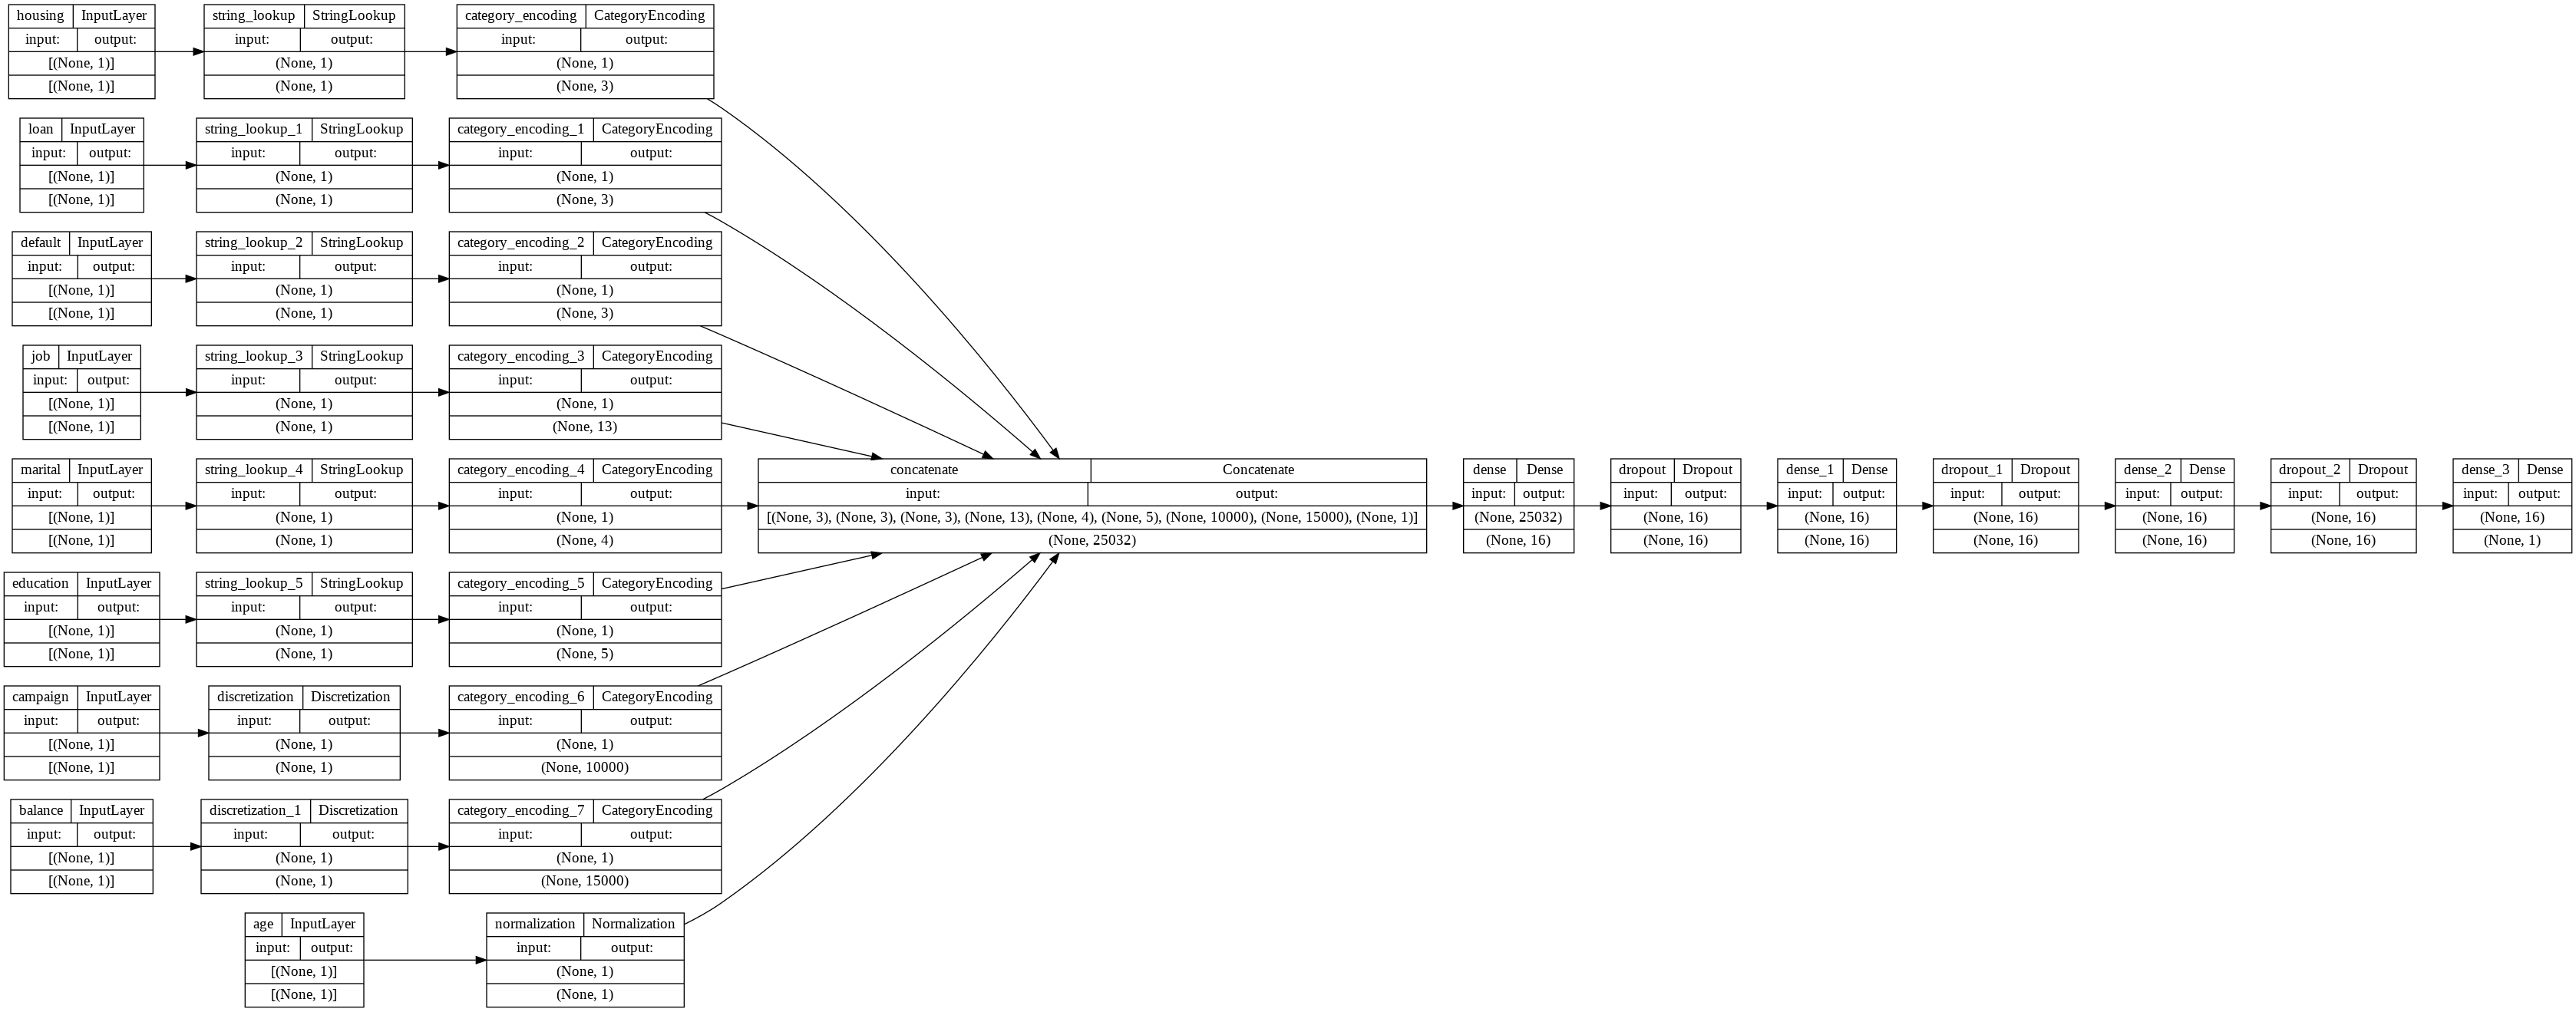

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.SensitivityAtSpecificity(0.5, name='specificity')
]
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [ ]:
loss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[loss, val_loss], steps_per_epoch=512)

Epoch 1/100
512/512 [==============================] - 37s 60ms/step - loss: 0.6736 - tp: 16229.0000 - fp: 8674.0000 - tn: 24113.0000 - fn: 16520.0000 - accuracy: 0.6156 - precision: 0.6517 - recall: 0.4956 - specificity: 0.6944 - val_loss: 0.7001 - val_tp: 385.0000 - val_fp: 2331.0000 - val_tn: 3232.0000 - val_fn: 179.0000 - val_accuracy: 0.5903 - val_precision: 0.1418 - val_recall: 0.6826 - val_specificity: 0.7535
Epoch 2/100
512/512 [==============================] - 29s 58ms/step - loss: 0.6214 - tp: 19971.0000 - fp: 8322.0000 - tn: 24681.0000 - fn: 12562.0000 - accuracy: 0.6813 - precision: 0.7059 - recall: 0.6139 - specificity: 0.7847 - val_loss: 0.7079 - val_tp: 438.0000 - val_fp: 2284.0000 - val_tn: 3279.0000 - val_fn: 126.0000 - val_accuracy: 0.6067 - val_precision: 0.1609 - val_recall: 0.7766 - val_specificity: 0.8369
Epoch 3/100
512/512 [==============================] - 30s 59ms/step - loss: 0.5499 - tp: 24641.0000 - fp: 8335.0000 - tn: 24424.0000 - fn: 8136.0000 - accuracy

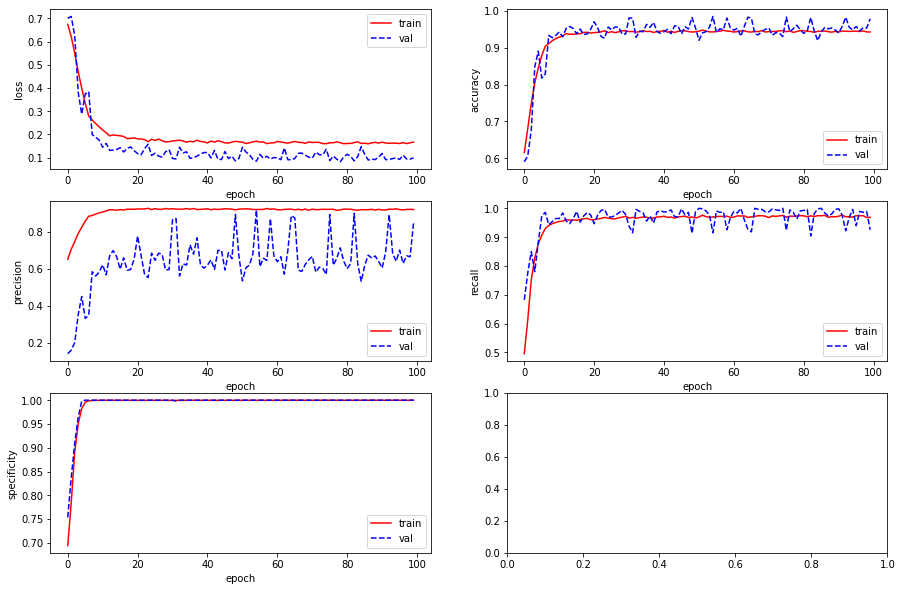

In [ ]:
metric = ['loss', 'accuracy', 'precision', 'recall', 'specificity']
plot_metric(3,2, history, metric)

##Evaluate Model

In [ ]:
predict_test = model.predict(test_ds)
test_ds_unbach = test_ds.unbatch()
label_test = [i[1] for i in list(test_ds_unbach.as_numpy_iterator())]


36/36 [==============================] - 1s 32ms/step - loss: 0.7168 - tp: 306.0000 - fp: 85.0000 - tn: 3915.0000 - fn: 215.0000 - accuracy: 0.9336 - precision: 0.7826 - recall: 0.5873 - specificity: 0.6987
loss :  0.7167870998382568
tp :  306.0
fp :  85.0
tn :  3915.0
fn :  215.0
accuracy :  0.9336429834365845
precision :  0.782608687877655
recall :  0.5873320698738098
specificity :  0.698656439781189
Tidak Berlangganan dengan Prediksi yang tepat (True Negatives):  3915
Tidak Berlangganan dengan Prediksi yang salah (False Positives):  85
Berlangganan dengan Prediksi yang salah (False Negatives):  215
Berlangganan dengan Prediksi yang tepat (True Positives):  306
Total:  521


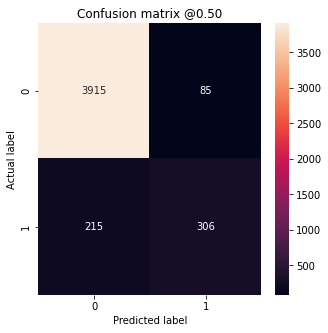

In [ ]:
model_evaluate = model.evaluate(test_ds)
for name_metric, value_evaluate in zip(model.metrics_names, model_evaluate):
  print(name_metric, ': ', value_evaluate)

plot_confution_matrix(label_test, predict_test)

##Simulation

In [ ]:
dataset_test.sort_values(by=["target"], ascending=False).columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'target'],
      dtype='object')

In [ ]:
sample = {
    'age': 51,
    'job': 'retired',
    'marital': 'divorced',
    'education': 'secondary',
    'balance': 1679,
    'housing': 'no',
    'loan': 'no',
    'default': 'no',
    'campaign': 1,
    'poutcome': 'other'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    f"Probabilitas untuk berlangganan deposito berjangka adalah {round(100 * predictions[0][0], 2)} % "
    f"untuk setuju "
    f"{predictions}"
)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['poutcome'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Probabilitas untuk berlangganan deposito berjangka adalah 6.91 % untuk setuju [[0.06914144]]


##Save Model

In [ ]:
MODEL_DIR = "models/model"
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
tf.keras.models.save_model(
    model,
    export_path
)

INFO:tensorflow:Assets written to: models/model/1/assets


## Conclusion

In [ ]:
print(
    f"Dari {len(dataset_test)} pelanggan, {model_evaluate[3]} nya berhasil diprediksi tidak akan berlangganan. Dengan begitu, dengan menggunakan model ini kita dapat \n"
    f"mengurangi jumlah kampanye sebesar {round(model_evaluate[3]/len(dataset_test)*100, 2)} % (karena tim marketing tidak perlu mendatangi {model_evaluate[3]} orang tsb). Akan tetapi kehilangan {model_evaluate[4]} \n"
    f"pelanggan yang diprediksi tidak berlangganan yang seharusnya berlangganan"
)

Dari 4521 pelanggan, 3915.0 nya berhasil diprediksi tidak akan berlangganan. Dengan begitu, dengan menggunakan model ini kita dapat 
mengurangi jumlah kampanye sebesar 86.6 % (karena tim marketing tidak perlu mendatangi 3915.0 orang tsb). Akan tetapi kehilangan 215.0 
pelanggan yang diprediksi tidak berlangganan yang seharusnya berlangganan


## Download Save Model

In [ ]:
!zip -r /content/model_fintech_portugies.zip /content/models

updating: content/models/ (stored 0%)
updating: content/models/model/ (stored 0%)
updating: content/models/model/1/ (stored 0%)
updating: content/models/model/1/saved_model.pb (deflated 88%)
updating: content/models/model/1/variables/ (stored 0%)
updating: content/models/model/1/variables/variables.data-00000-of-00001 (deflated 16%)
updating: content/models/model/1/variables/variables.index (deflated 69%)
updating: content/models/model/1/keras_metadata.pb (deflated 93%)
updating: content/models/model/1/assets/ (stored 0%)


In [ ]:
files.download('/content/model_fintech_portugies.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>